In [4]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT2()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 14 fitted parameters, 10 of which have a bayesian prior
Total Residual:                        759.4
Components of residual:
Concentration Trajectories (Figure 2): 315.7
Initial Reaction Rate (Figure 3A):     158.3
Mg2PPi solubility (Figure 3B):         209.5
Parameter priors:                      75.9


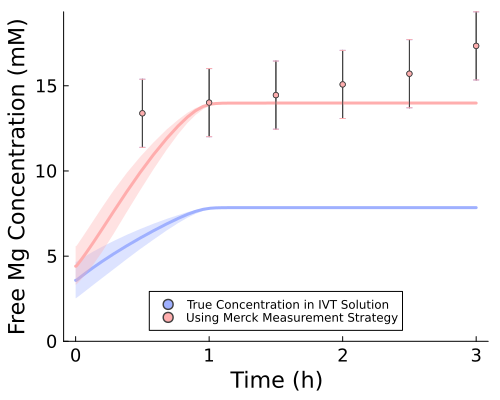

In [3]:
#Now we plot against Merck Free Mg ion data
filename = "../data/external/merck/merck_freeMg.csv"
labels = ["True Concentration in IVT Solution", "Using Merck Measurement Strategy"]
plt = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:2, labels = labels, dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false,mcuncertainty = true)
plot!(plt, legend = :bottom)

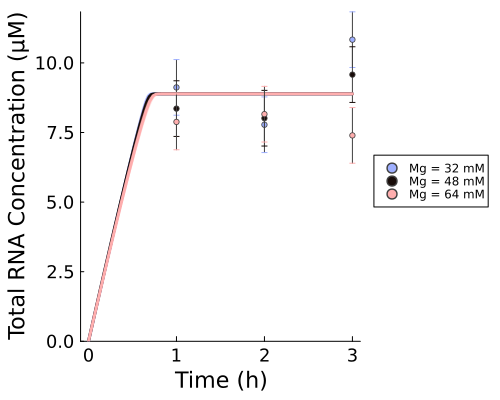

In [5]:
#Now we plot against Merck Free Mg ion data
filename = "../data/external/merck/merck_dsRNA.csv"
labels = ["Mg = 32 mM","Mg = 48 mM","Mg = 64 mM"]
plt = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:3, labels = labels, dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false,mcuncertainty = true)

In [6]:
#First, we are going to generate a new modeling framework where we fix the fitted akama parameters, and only allow two to vary for fitting: k_i and k_e
dsRNAfittingparameters = [Parameter("K_ds",1,1e-5,1e5)]
dsRNAfittingmodel = fixparameters(fittingmodel,akamafittedparameterslist,resetparameters = dsRNAfittingparameters);
# dsRNAfilename = "../data/external/merck/merck_dsRNA.csv"
# dsRNAresidualfunction = (model,_,x) -> customresidual(model,dsRNAfilename,x)
# optim=localopt(dsRNAfittingmodel,[],300,[-1.3],dsRNAresidualfunction,verbose = true)
# dsRNAfittedparamslist = optim[4]
# dsRNAfittedparams = fullparameterset(dsRNAfittingmodel,dsRNAfittedparamslist)
# dsRNAcovariancemat = getcovariancematrix(dsRNAfittingmodel,[],dsRNAfittedparamslist,customfile = true,customfilename = dsRNAfilename, includeakama = false);

In [7]:
dsRNAfittedparamslist = [-1.2]
dsRNAfittedparams = fullparameterset(dsRNAfittingmodel,dsRNAfittedparamslist)
dsRNAcovariancemat = 1e-3*ones(1,1);

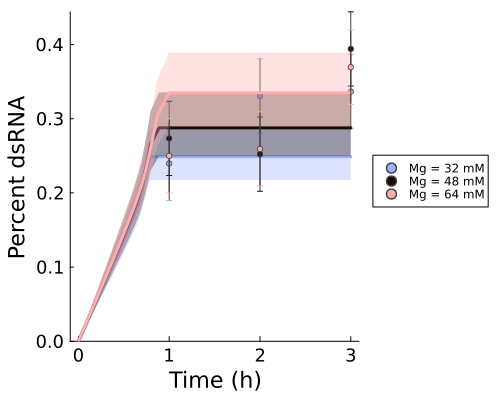

In [8]:
#Now we plot against Merck Free Mg ion data
filename = "../data/external/merck/merck_dsRNA.csv"
labels = ["Mg = 32 mM","Mg = 48 mM","Mg = 64 mM"]
plt = plotfromcsv(dsRNAfittingmodel,dsRNAfittedparamslist,dsRNAcovariancemat,filename, range = 4:6, labels = labels, dataerrorbars = true, plotsize = (500,400), multiplot = false,maximumyield = false,mcuncertainty = true)